<a href="https://colab.research.google.com/github/Mayvei64/The-end/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Approved_and_disapproved_loan_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

#Оптимальные параметры моделей
from sklearn.model_selection import GridSearchCV

#оценка точности моделей
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#рассматриваемые модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



#Информация о датасете

Набор данных содержит информацию, по которым принимается решение: одобрить кредит или отклонить в просьбе полчучения кредита.

Столбцы:

- person_age - возраст человека
- person_gender - пол человека (1 - man, 0 - woman)
- person_education - уровент образования
- person_income - годовой доход
- person_emp_exp - опыт работы
- person_home_ownership - статус владения жильем (например, аренда, собственное владение, ипотека)
- loan_amnt - запрашиваемая сумма кредита
- loan_intent - цель кредита
- loan_int_rate - процентная ставка по кредиту
- loan_percent_income - сумма кредита в процентах от годового дохода
- cb_person_cred_hist_length - продолжительность кредитной истории в годах
- credit_score - кредитный рейтинг человека
- previous_loan_defaults_on_file - 	индикатор предыдущих дефолтов по кредитам
- loan_status - статус одобрения кредита: 1 = одобрено; 0 = отклонено

Целевая переменная - loan_status.

Всего 14 стобцов и 45000 строк.


#Задача

Написать код, на основе которогог модель будет классифицировать людей на два типа: 1 - одобрен кредит для данного лица, 0 - не обдобрен кредит для данного лица. Другими словами, решить задачи бинароной классификации.

In [ ]:
# открываем датасет
data = pd.read_csv('loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#Анализ данных

##Название столбцов

In [ ]:
# Выведем название столбцов
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=45000, step=1)

##Проверка на пропуски

In [ ]:
# Есть ли пропуски?
data.info()

#Пропусков нет.Также можно посмотреть тип каждого переменной(признака)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

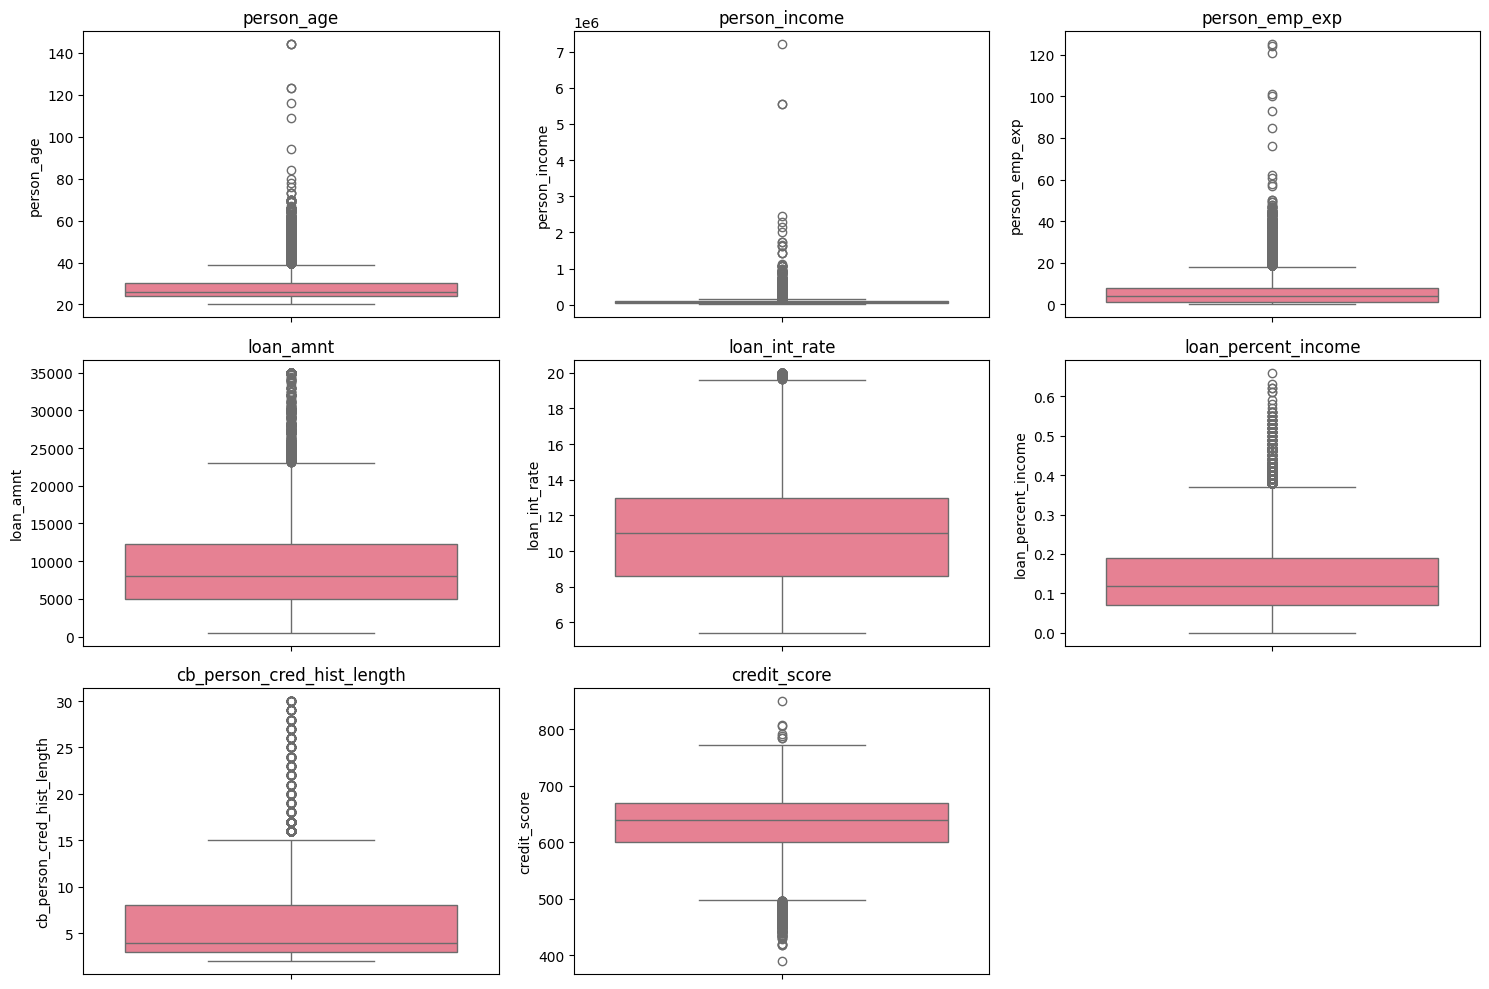

In [ ]:
# Исследование на выбросы числовые признаки
numerical_features = ['person_age', 'person_income', 'person_emp_exp',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                      'cb_person_cred_hist_length', 'credit_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##Выведем статистическую информацию о наборе данны

In [ ]:
data.describe()

# здесь можно посмотреть количество наблюдений, среднее значение, стандартное отклонение, квартили,
# минимальное и максимальное значение для каждгого численного признакак

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


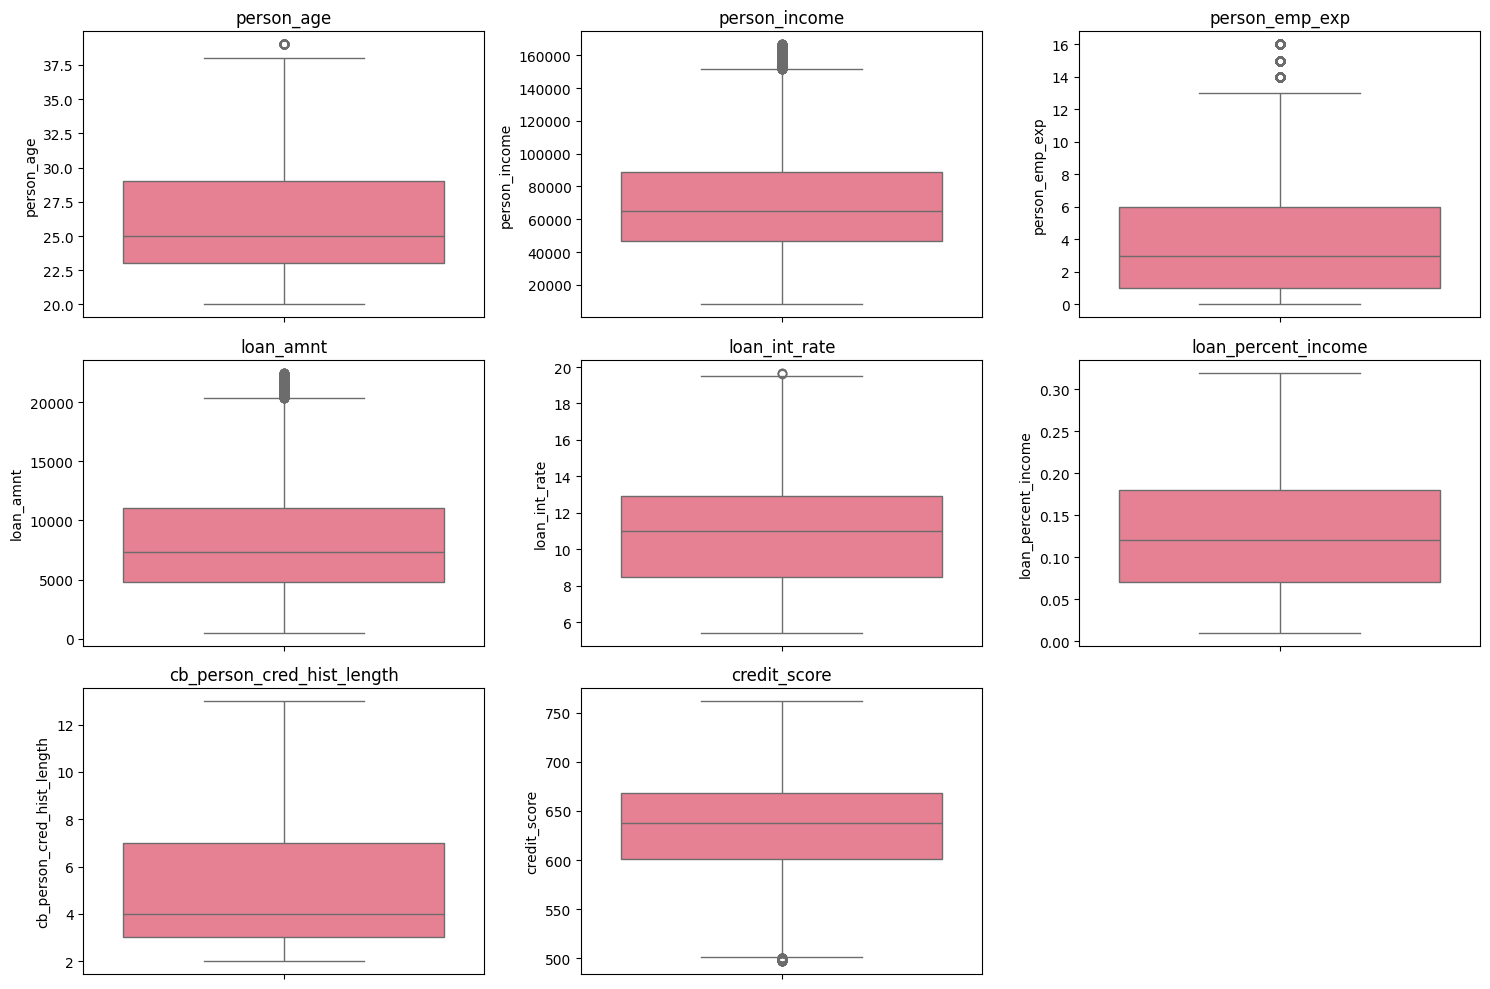

In [ ]:
# Определение функции для удаления выбросов с использованием межквартильного размаха (IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Первый квартиль
    Q3 = data[column].quantile(0.75)  # Третий квартиль
    IQR = Q3 - Q1  # Межквартильный размах
    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница для выбросов
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница для выбросов
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]  # Фильтрация данных
    return data_filtered


# Применение функции к каждому числовому столбцу
for col in numerical_features:
    data = remove_outliers_iqr(data, col)

#Отображение ящичковых диаграмм снова для визуализации исчезновения выбросов
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
data = data.dropna()

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000,36065.000000
mean,26.404631,70058.799335,4.071538,8276.245529,10.881279,0.129732,4.998087,632.102703,0.202107
std,3.867338,31562.837789,3.878033,4782.254222,2.927990,0.071587,2.649725,47.684452,0.401577
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,497.000000,0.000000
25%,23.000000,46458.000000,1.000000,4800.000000,8.490000,0.070000,3.000000,601.000000,0.000000
50%,25.000000,64796.000000,3.000000,7350.000000,11.010000,0.120000,4.000000,638.000000,0.000000
75%,29.000000,88578.000000,6.000000,11026.000000,12.910000,0.180000,7.000000,668.000000,0.000000
max,39.000000,166754.000000,16.000000,22500.000000,19.690000,0.320000,13.000000,762.000000,1.000000


#Нормализация

In [ ]:
# проведём нормализацию численных признаков, чтобы модель одинакова учитывала каждый признак
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# создадим копию датасета, чтобы не было изменений в изначальном датасете
df = pd.DataFrame(data)
df_copy = df.copy()

df_copy_new = df_copy.drop( ['person_gender','person_education',
                            'person_home_ownership', 'loan_intent',
                            'previous_loan_defaults_on_file',
                            'loan_status' ],  axis = 1)

norm_df = scaler.fit_transform(df_copy_new)
norm_df = pd.DataFrame(norm_df, columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length	', 'credit_score' ])

norm_df.head(3)
# получили нормализованные численные данные


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length\t,credit_score
0,0.052632,0.026973,0.0,0.022727,0.400841,0.225806,0.000000,0.026415
1,0.052632,0.031187,0.0,0.090909,0.120533,0.580645,0.000000,0.132075
2,0.052632,0.029851,0.0,0.050000,0.653118,0.387097,0.090909,0.539623


## Замена категориальных значений на численные

In [ ]:
# Категориальные переменными(в том числе и целевая переменная) - ['person_gender','person_education',
#                                                              'person_home_ownership', 'loan_intent',
#                                                              'previous_loan_defaults_on_file',
#                                                              'loan_status' ]

df1 = pd.DataFrame(data)
df1_copy = df1.copy()

df1_obj = df1.select_dtypes(include = ['object'])


# Функция для преобразования категориальный значений в численные
def Categorial(Df):
  arr = Df.columns

  for i in arr:
    Df[i] = Df[i].astype('category') # преобразует столбец в категорию
    Df[i] = Df[i].cat.codes # присваем численное значение

  return Df

df1_obj_int = Categorial(df1_obj)
df1_obj_int.head(3)






,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
1,0,3,2,1,1
5,0,3,2,5,0
9,0,3,2,5,0


In [ ]:
# Количестов людей по гендеру
df1_obj_int['person_gender'].value_counts()

# 1 - мужчины
# 0 - женщины

,count
person_gender,
1,19742
0,16323


In [ ]:
# Количество людей по дефолту кредита
df1_obj_int['previous_loan_defaults_on_file'].value_counts()

# 1 - был(и) дефолт(ы)
# 0 - не было дефолтов

,count
previous_loan_defaults_on_file,
1,18882
0,17183


# Итоговый датасет для бинароной классификации

In [ ]:
Data = pd.concat([norm_df, df1_obj_int], axis = 1) # объединяем нормальзованные переменные с категориальными
Data = Data.dropna()
Data['loan_status'] = data['loan_status'] # добавляем целевую переменную
Data.head(3) # Итоговый датасет

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length\t,credit_score,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
1,0.052632,0.031187,0.0,0.090909,0.120533,0.580645,0.000000,0.132075,0.0,3.0,2.0,1.0,1.0,0
5,0.052632,0.039608,0.0,0.185227,0.863350,1.000000,0.090909,0.486792,0.0,3.0,2.0,5.0,0.0,1
9,0.052632,0.045038,0.0,0.090909,0.146461,0.516129,0.181818,0.388679,0.0,3.0,2.0,5.0,0.0,1


In [ ]:
# Количество одобренных и неодобренных кредитов
Data['loan_status'].value_counts()

,count
loan_status,
0,23689
1,5125


## Получили несбалансироавнность классов

In [ ]:
# можно применить технику downsampling (уменьшение количества данных)

# Разделение на два датафрейма по классу
class_0 = Data.query("loan_status == 0")
class_1 = Data.query("loan_status == 1")

# Downsampling класса 0 до размера класса 1
sampled_class_0 = class_0.sample(n=len(class_1), random_state=42)

"""np.random.seed(42) устанавливает начальное число генератора случайных чисел,
чтобы результаты были воспроизводимыми."""

# Объединение двух датафреймов
balanced_df = pd.concat([sampled_class_0, class_1], ignore_index=True)

# Проверка нового распределения классов
#print(balanced_df['loan_status'].value_counts())

DF = balanced_df.dropna()
DF.head(3)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length\t,credit_score,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,loan_status
0,0.210526,0.272233,0.0625,0.477273,0.000000,0.645161,0.181818,0.671698,0.0,0.0,0.0,1.0,1.0,0
1,0.315789,0.228498,0.2500,0.159091,0.589348,0.258065,0.090909,0.747170,0.0,3.0,3.0,2.0,0.0,0
2,0.210526,0.581812,0.2500,0.886364,0.391731,0.612903,0.181818,0.573585,1.0,1.0,0.0,3.0,1.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


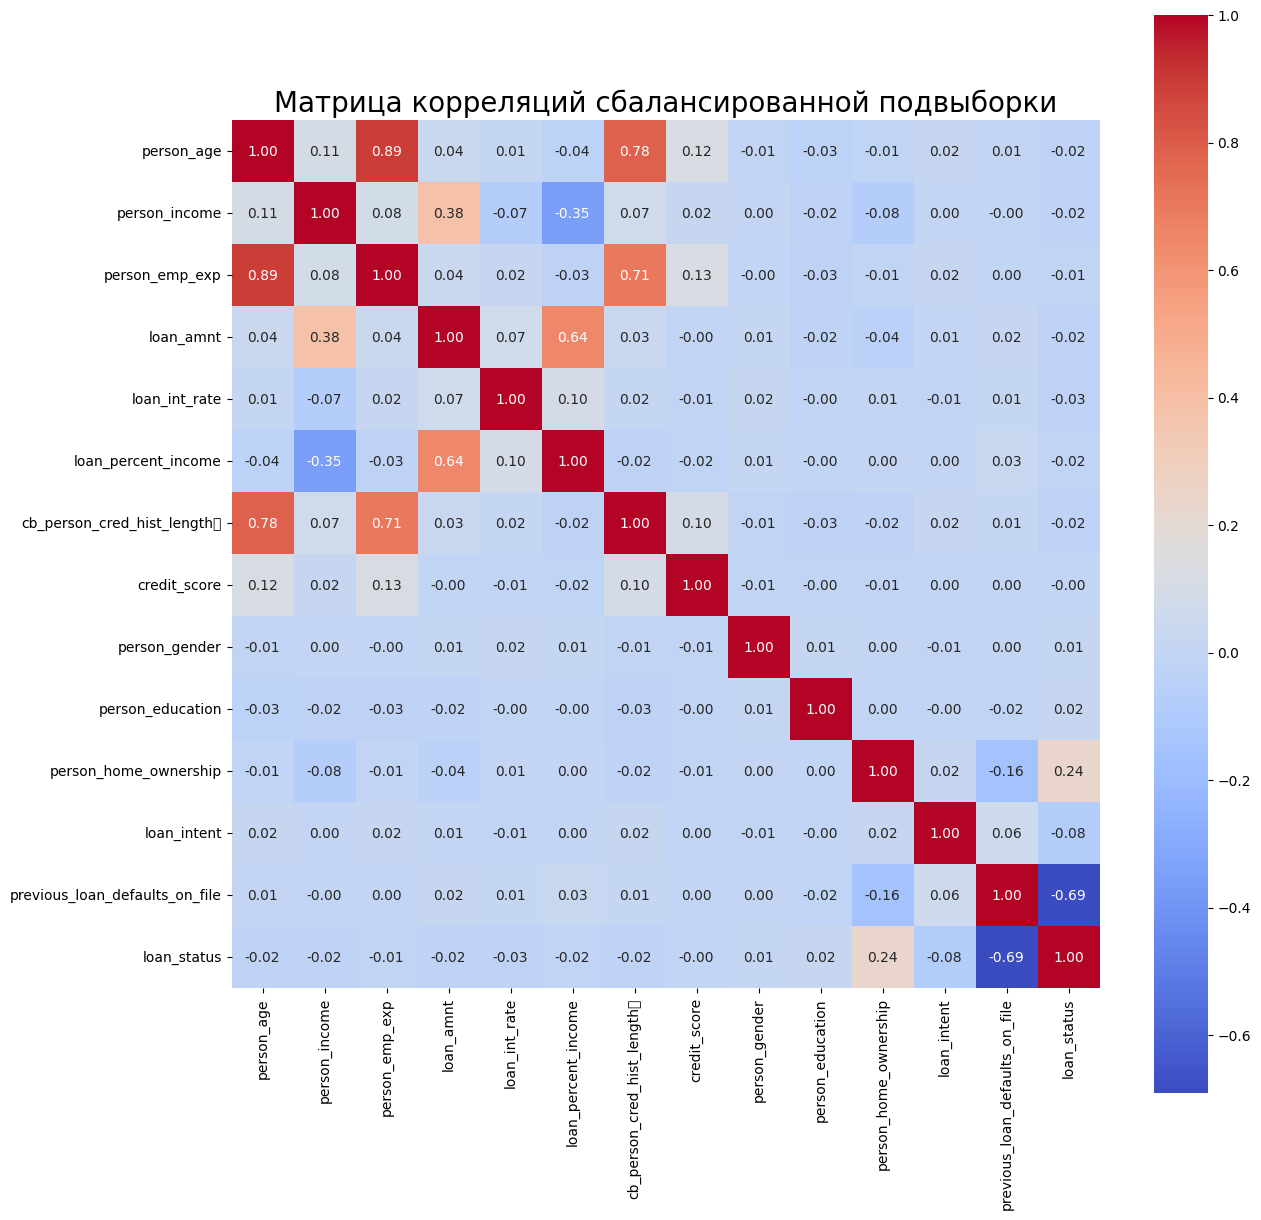

In [ ]:
# тепловая карта

corr = DF.corr()

plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляций сбалансированной подвыборки', fontsize=20)
plt.show()

###Классы уравновешены.Теперь можно приступать к классификации.

#Логистическая регрессия

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA


X = DF.drop(['loan_status'], axis = 1)
y = DF['loan_status']

print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (10250, 13) | y shape: (10250,) 


Точность модели: 0.8185365853658536

Accuracy: 0.8185365853658536
Precision: 0.7357933579335794
Recall: 0.9861523244312562
F1 score: 0.8427726120033813


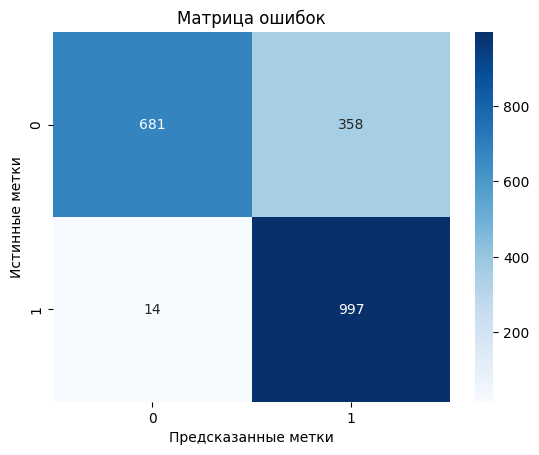

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта классификатора логистической регрессии
clf = LogisticRegression(random_state=42)

# Обучение модели
clf.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_log = clf.predict(X_test)


# Вычислим различные метрики
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Оценка точности модели
print(f'Точность модели: {clf.score(X_test, y_test)}')
print()
# Выведем результаты
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 score:", f1_log)

# Построение матрицы ошибок
cm_log = confusion_matrix(y_test, y_pred_log)

# Визуализация матрицы ошибок
sns.heatmap(cm_log, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


#################################################### можно ещё ROC кривую построить


Построим roc-кривые для оценки точности

Пояснить что у нас падает точность

#Метод опорных векторов(SVM)

Точность модели: 0.8294413242684008

Accuracy: 0.8294413242684008
Precision: 0.7465878070973613
Recall: 0.9879590608067429
F1 score: 0.8504793988079813


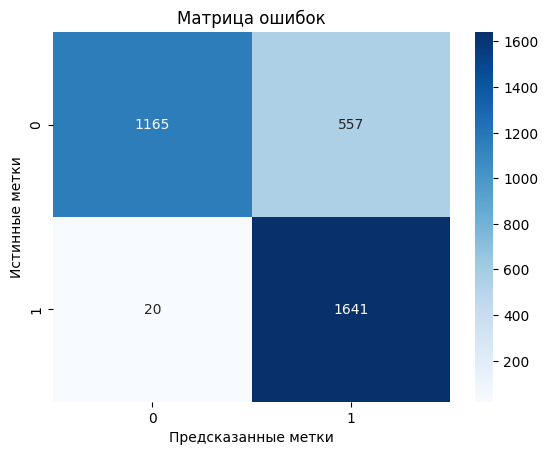

In [ ]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Создание и обучение модели SVM с RBF ядром
svm = SVC(kernel='rbf', gamma='auto', C=1.0)
svm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_svm = svm.predict(X_test)

# Оценка точности модели
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


print(f'Точность модели: {svm.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 score:", f1_svm)

# Построение матрицы ошибок
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Визуализация матрицы ошибок
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Деревья решений

Точность модели: 0.8303281111439551

Accuracy: 0.8303281111439551
Precision: 0.7788609543355567
Recall: 0.9139072847682119
F1 score: 0.8409972299168975


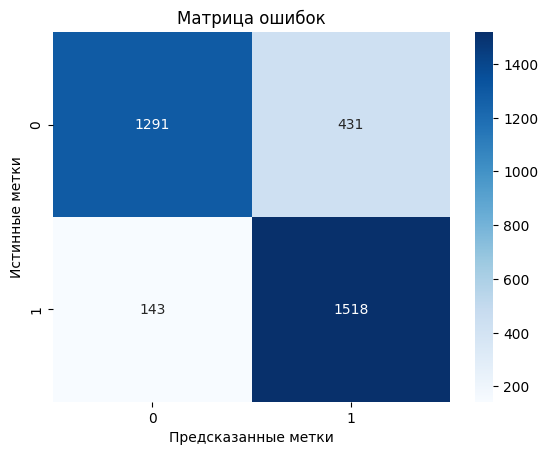

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Создание и обучение модели дерева решений
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_tree = dtc.predict(X_test)

# Оценка точности модели
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print(f'Точность модели: {dtc.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 score:", f1_tree)

# Построение матрицы ошибок
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Визуализация матрицы ошибок
sns.heatmap(cm_tree, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Случайный лес

Точность модели: 0.8239024390243902

Accuracy: 0.8239024390243902
Precision: 0.7563091482649842
Recall: 0.9485657764589516
F1 score: 0.8415971917507679


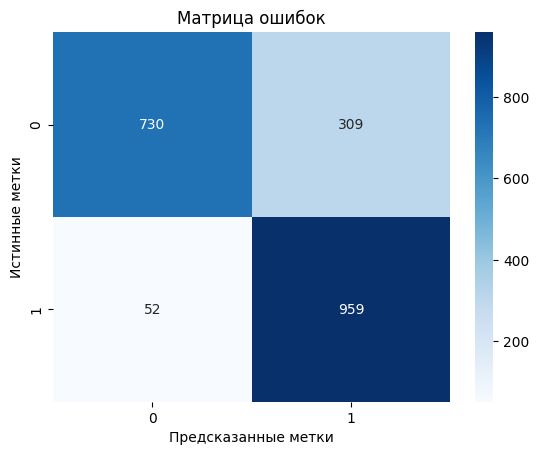

In [ ]:
# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_RandF = rf_model.predict(X_test)

# Оценка точности модели
accuracy_RandF = accuracy_score(y_test, y_pred_RandF)
precision_RandF = precision_score(y_test, y_pred_RandF)
recall_RandF = recall_score(y_test, y_pred_RandF)
f1_RandF = f1_score(y_test, y_pred_RandF)

print(f'Точность модели: {rf_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_RandF)
print("Precision:", precision_RandF)
print("Recall:", recall_RandF)
print("F1 score:", f1_RandF)

# Построение матрицы ошибок
cm_RandF = confusion_matrix(y_test, y_pred_RandF)

# Визуализация матрицы ошибок
sns.heatmap(cm_RandF, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Градиентный бустинг (Gradient Boosting)

Точность модели: 0.8263414634146341

Accuracy: 0.8263414634146341
Precision: 0.752895752895753
Recall: 0.9643916913946587
F1 score: 0.8456201214223764


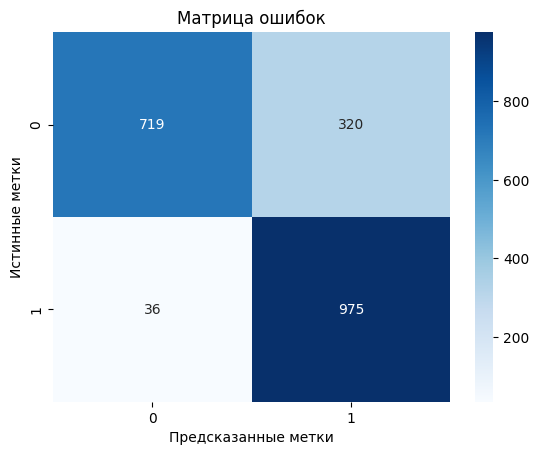

In [ ]:
# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_gb = gb_model.predict(X_test)

# Оценка точности модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f'Точность модели: {gb_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 score:", f1_gb)

# Построение матрицы ошибок
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Визуализация матрицы ошибок
sns.heatmap(cm_gb, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


# K-ближайших соседей (k-Nearest Neighbors, KNN)

Точность модели: 0.8043902439024391

Accuracy: 0.8043902439024391
Precision: 0.7611301369863014
Recall: 0.8793273986152325
F1 score: 0.8159706287287747


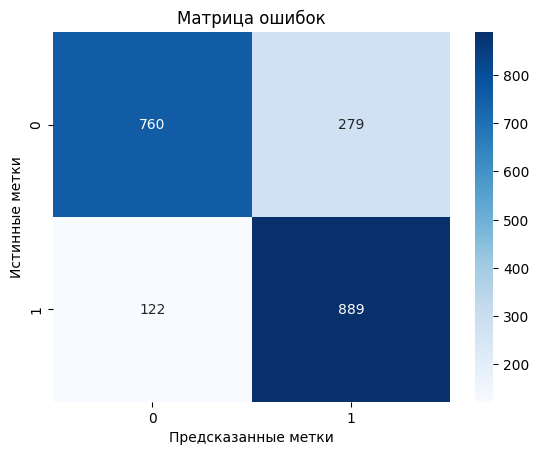

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели kNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_knn = knn_model.predict(X_test)

# Оценка точности модели
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f'Точность модели: {knn_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 score:", f1_knn)

# Построение матрицы ошибок
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Визуализация матрицы ошибок
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


# Гаусовский наивный байес(GNB)

Точность модели: 0.8209756097560975

Accuracy: 0.8209756097560975
Precision: 0.7336719883889695
Recall: 1.0
F1 score: 0.8463792381749686


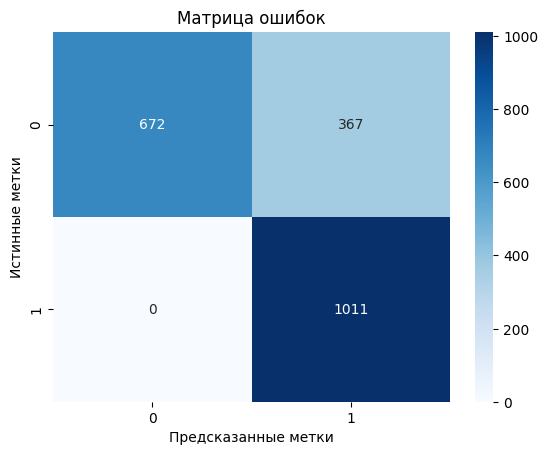

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred_NB = nb_model.predict(X_test)

# Оценка точности модели
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

print(f'Точность модели: {nb_model.score(X_test, y_test)}')
print()
print("Accuracy:", accuracy_NB)
print("Precision:", precision_NB)
print("Recall:", recall_NB)
print("F1 score:", f1_NB)

# Построение матрицы ошибок
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Визуализация матрицы ошибок
sns.heatmap(cm_NB, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()




# Нейронные сети

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

"""
# Преобразование меток в категориальные
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Определение архитектуры нейронной сети
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

# Компилирование модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test_cat))

# Прогнозирование на тестовых данных
y_pred_neuro = model.predict_classes(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred_neuro)
print(f'Accuracy: {accuracy:.2f}')
"""

# Создание модели
model_n = Sequential()
model_n.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_n.add(Dense(32, activation='relu'))
model_n.add(Dense(16, activation='relu'))
model_n.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model_n.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model_n.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

# Оценка модели
test_loss, test_acc = model_n.evaluate(X_test, y_test)
print()
print(f'Тестовая точность: {test_acc:.2f}')
print()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7255 - loss: 0.5791 - val_accuracy: 0.8249 - val_loss: 0.3807
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.3813 - val_accuracy: 0.8234 - val_loss: 0.3771
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8321 - loss: 0.3670 - val_accuracy: 0.8254 - val_loss: 0.3792
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 0.3821 - val_accuracy: 0.8098 - val_loss: 0.3829
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.3762 - val_accuracy: 0.8244 - val_loss: 0.3736
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 0.3779 - val_accuracy: 0.8224 - val_loss: 0.3737
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.3708 - val_accuracy: 0.8259 - val_loss: 0.3743
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8306 - loss: 0.3678 - val_accuracy: 0.

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8288
Precision: 0.7535
Recall: 0.9703
F1 score: 0.8482


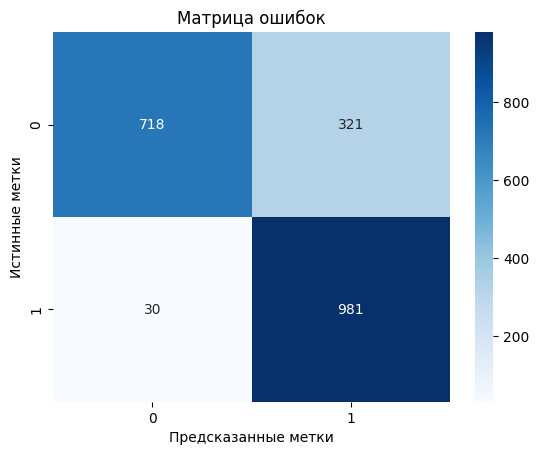

In [ ]:
y_pred_neuro_probs = model_n.predict(X_test)
y_pred_neuro = (y_pred_neuro_probs > 0.5).astype(int)


accuracy_neuro = accuracy_score(y_test, y_pred_neuro)
precision_neuro = precision_score(y_test, y_pred_neuro)
recall_neuro = recall_score(y_test, y_pred_neuro)
f1_neuro = f1_score(y_test, y_pred_neuro)

print(f'Accuracy: {accuracy_neuro:.4f}')
print(f'Precision: {precision_neuro:.4f}')
print(f'Recall: {recall_neuro:.4f}')
print(f'F1 score: {f1_neuro:.4f}')

# Создание матрицы ошибок
cm_neuro = confusion_matrix(y_test, y_pred_neuro)

# Визуализация матрицы ошибок
sns.heatmap(cm_neuro, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()

# Сравнение моделей

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Словарь для хранения моделей и их имен
models = {
    "Логистическая регрессия": LogisticRegression(random_state=42),
    "SVM": SVC(kernel='rbf', gamma='auto', C=1.0, probability=True),
    "Деревья решений": DecisionTreeClassifier(criterion='gini', max_depth=5),
    "Случайный лес": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "Градиентный бустинг": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Гаусовский наивный байес": GaussianNB(),
}

# Создание пустого списка для хранения результатов
results = []

# Обучение и оценка каждой модели
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Добавление результатов в список
    results.append([model_name, accuracy, precision, recall, f1])

results.append(["Neural Network", accuracy_neuro, precision_neuro, recall_neuro, f1_neuro])


# Создание DataFrame из списка результатов
results_df = pd.DataFrame(results, columns=["Модель", "Accuracy", "Precision", "Recall", "F1-мера"])

# Вывод таблицы результатов
results_df.to_excel('model_comparison.xlsx', index=False)
results_df


,Модель,Accuracy,Precision,Recall,F1-мера
0,Логистическая регрессия,0.818537,0.735793,0.986152,0.842773
1,SVM,0.825366,0.743112,0.987141,0.847918
2,Деревья решений,0.828780,0.777778,0.913947,0.840382
3,Случайный лес,0.823902,0.756309,0.948566,0.841597
4,Градиентный бустинг,0.826341,0.752896,0.964392,0.845620
5,KNN,0.804390,0.761130,0.879327,0.815971
6,Гаусовский наивный байес,0.820976,0.733672,1.000000,0.846379
7,Neural Network,0.828780,0.753456,0.970326,0.848249


Визуализации

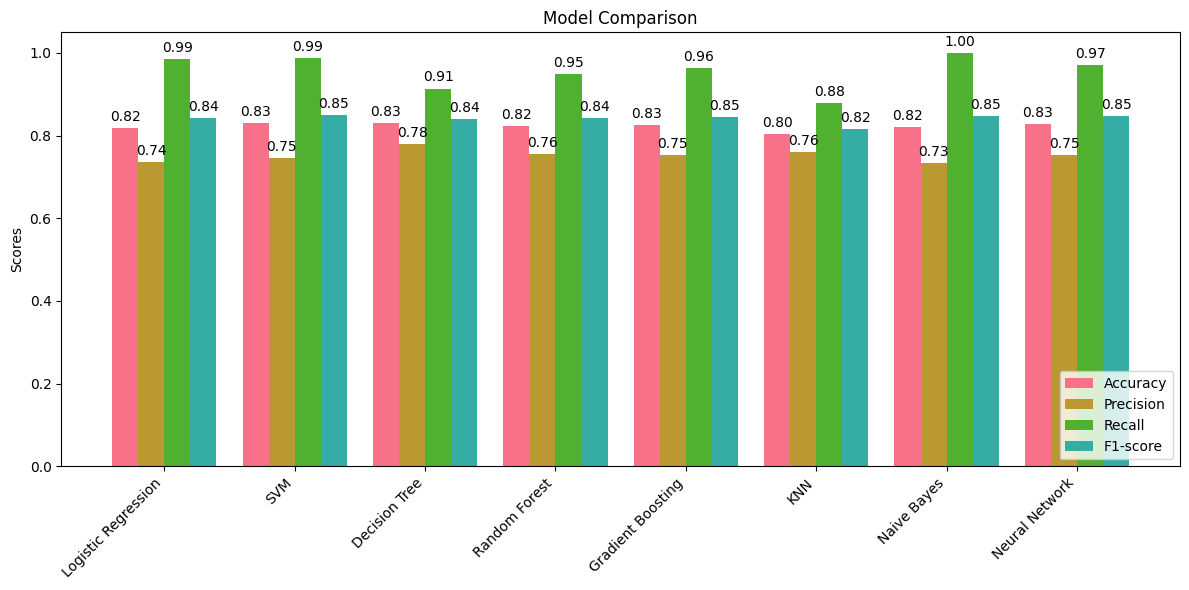

In [ ]:
# Данные для графика
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Neural Network']
accuracy = [accuracy_log, accuracy_svm, accuracy_tree, accuracy_RandF, accuracy_gb, accuracy_knn, accuracy_NB, accuracy_neuro]
precision = [precision_log, precision_svm, precision_tree, precision_RandF, precision_gb, precision_knn, precision_NB, precision_neuro]
recall = [recall_log, recall_svm, recall_tree, recall_RandF, recall_gb, recall_knn, recall_NB, recall_neuro]
f1 = [f1_log, f1_svm, f1_tree, f1_RandF, f1_gb, f1_knn, f1_NB, f1_neuro]

# Создание столбчатой диаграммы
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1, width, label='F1-score')

# Настройка графика
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='lower right')

# Добавление значений над столбцами
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

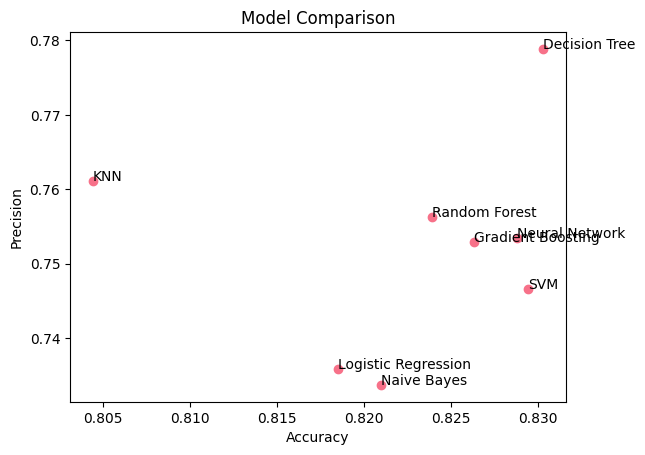

In [ ]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'Neural Network']
accuracy = [accuracy_log, accuracy_svm, accuracy_tree, accuracy_RandF, accuracy_gb, accuracy_knn, accuracy_NB, accuracy_neuro]
precision = [precision_log, precision_svm, precision_tree, precision_RandF, precision_gb, precision_knn, precision_NB, precision_neuro]

fig, ax = plt.subplots()
ax.scatter(accuracy, precision)

for i, model in enumerate(models):
  ax.annotate(model, (accuracy[i], precision[i]))

ax.set_xlabel('Accuracy')
ax.set_ylabel('Precision')
ax.set_title('Model Comparison')
plt.show()

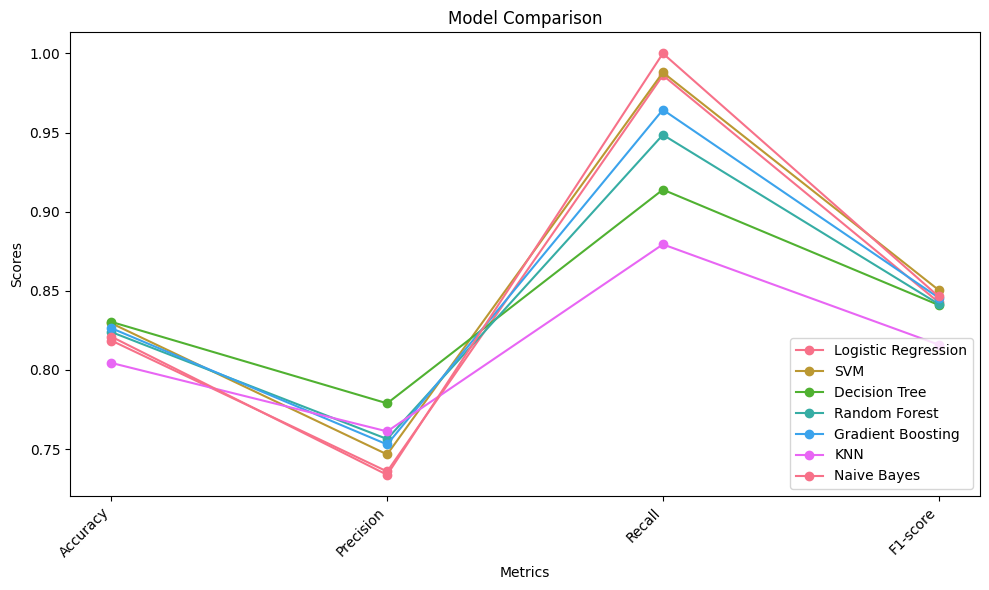

In [ ]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
data = [
       [accuracy_log, precision_log, recall_log, f1_log],
       [accuracy_svm, precision_svm, recall_svm, f1_svm],
       [accuracy_tree, precision_tree, recall_tree, f1_tree],
       [accuracy_RandF, precision_RandF, recall_RandF, f1_RandF],
       [accuracy_gb, precision_gb, recall_gb, f1_gb],
       [accuracy_knn, precision_knn, recall_knn, f1_knn],
       [accuracy_NB, precision_NB, recall_NB, f1_NB]
]
df = pd.DataFrame(data, index=models, columns=metrics)

fig, ax = plt.subplots(figsize=(10, 6))

for model in models:
    ax.plot(df.columns, df.loc[model], marker='o', label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.legend(loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Написать что значит